
# Data Explanatory & Pre processing


In [2]:
import pandas as pd
import matplotlib. pyplot as plt
import numpy as np
import seaborn as sns

df = pd.read_csv('../data/processed_tweet_data.csv', encoding='latin-1')

df.head()

,statuses_count,created_at,source,original_text,polarity,subjectivity,favorite_count,retweet_count,screen_name,followers_count,friends_count,possibly_sensitive,hashtags,user_mentions,location,language
0,40,Fri Apr 22 22:20:18 +0000 2022,"<a href=""http://twitter.com/download/android"" ...",RT @nikitheblogger: Irre: Annalena Baerbock sa...,0.0,0.0,2356,355,McMc74078966,3,12,NaN,[],"[{'screen_name': 'nikitheblogger', 'name': 'Ne...",NaN,de
1,40,Fri Apr 22 22:19:16 +0000 2022,"<a href=""http://twitter.com/download/android"" ...",RT @sagt_mit: Merkel schaffte es in 1 Jahr 1 M...,0.0,0.0,1985,505,McMc74078966,3,12,NaN,[],"[{'screen_name': 'sagt_mit', 'name': 'Sie sagt...",NaN,de
2,40,Fri Apr 22 22:17:28 +0000 2022,"<a href=""http://twitter.com/download/android"" ...",RT @Kryptonoun: @WRi007 Pharma in Lebensmittel...,0.0,0.0,16,4,McMc74078966,3,12,NaN,[],"[{'screen_name': 'Kryptonoun', 'name': 'Krypto...",NaN,de
3,40,Fri Apr 22 22:17:20 +0000 2022,"<a href=""http://twitter.com/download/android"" ...",RT @WRi007: Die #Deutschen sind ein braves Vol...,0.0,0.0,1242,332,McMc74078966,3,12,NaN,"[{'text': 'Deutschen', 'indices': [16, 26]}, {...","[{'screen_name': 'WRi007', 'name': 'Wolfgang B...",NaN,de
4,40,Fri Apr 22 22:13:15 +0000 2022,"<a href=""http://twitter.com/download/android"" ...",RT @RolandTichy: Baerbock verkÃ¼ndet mal so ne...,0.0,0.0,1329,386,McMc74078966,3,12,NaN,[],"[{'screen_name': 'RolandTichy', 'name': 'Rolan...",NaN,de


##### knowing the data types of the variable

In [148]:
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 24625 entries, 0 to 24624
Data columns (total 16 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   statuses_count      24625 non-null  int64  
 1   created_at          24625 non-null  object 
 2   source              24625 non-null  object 
 3   original_text       24625 non-null  object 
 4   polarity            24625 non-null  float64
 5   subjectivity        24625 non-null  float64
 6   favorite_count      24625 non-null  int64  
 7   retweet_count       24625 non-null  int64  
 8   screen_name         24625 non-null  object 
 9   followers_count     24625 non-null  int64  
 10  friends_count       24625 non-null  int64  
 11  possibly_sensitive  9975 non-null   object 
 12  hashtags            24625 non-null  object 
 13  user_mentions       24625 non-null  object 
 14  location            15731 non-null  object 
 15  language            24625 non-null  object 
dtypes: f

##### To know how many columns(variables) and rows(expierments)

In [149]:
df.shape

(24625, 16)

##### To Know Total amounts of null values

In [150]:
df.isna().sum()

statuses_count            0
created_at                0
source                    0
original_text             0
polarity                  0
subjectivity              0
favorite_count            0
retweet_count             0
screen_name               0
followers_count           0
friends_count             0
possibly_sensitive    14650
hashtags                  0
user_mentions             0
location               8894
language                  0
dtype: int64

#### Removing Duplicates

In [151]:
from clean_tweets_dataframe import Clean_Tweets
clean_tweets = Clean_Tweets(df)



Automation in Action...!!!


In [152]:
clean_tweets.drop_duplicate(df)
df.shape

(24625, 16)

##### No Duplicate Values

In [153]:
df.info() 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 24625 entries, 0 to 24624
Data columns (total 16 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   statuses_count      24625 non-null  int64  
 1   created_at          24625 non-null  object 
 2   source              24625 non-null  object 
 3   original_text       24625 non-null  object 
 4   polarity            24625 non-null  float64
 5   subjectivity        24625 non-null  float64
 6   favorite_count      24625 non-null  int64  
 7   retweet_count       24625 non-null  int64  
 8   screen_name         24625 non-null  object 
 9   followers_count     24625 non-null  int64  
 10  friends_count       24625 non-null  int64  
 11  possibly_sensitive  9975 non-null   object 
 12  hashtags            24625 non-null  object 
 13  user_mentions       24625 non-null  object 
 14  location            15731 non-null  object 
 15  language            24625 non-null  object 
dtypes: f

#### filling none values with unknown and not provided.

In [154]:
df = clean_tweets.fill_missing(df, "location", "Not provided")
df = clean_tweets.fill_missing(df, "possibly_sensitive", "unknown")
df.isna().sum()

statuses_count        0
created_at            0
source                0
original_text         0
polarity              0
subjectivity          0
favorite_count        0
retweet_count         0
screen_name           0
followers_count       0
friends_count         0
possibly_sensitive    0
hashtags              0
user_mentions         0
location              0
language              0
dtype: int64

##### converting the creating at column to datetime

In [155]:
df = clean_tweets.convert_to_datetime(df)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 24625 entries, 0 to 24624
Data columns (total 16 columns):
 #   Column              Non-Null Count  Dtype              
---  ------              --------------  -----              
 0   statuses_count      24625 non-null  int64              
 1   created_at          24625 non-null  datetime64[ns, UTC]
 2   source              24625 non-null  object             
 3   original_text       24625 non-null  object             
 4   polarity            24625 non-null  float64            
 5   subjectivity        24625 non-null  float64            
 6   favorite_count      24625 non-null  int64              
 7   retweet_count       24625 non-null  int64              
 8   screen_name         24625 non-null  object             
 9   followers_count     24625 non-null  int64              
 10  friends_count       24625 non-null  int64              
 11  possibly_sensitive  24625 non-null  object             
 12  hashtags            24625 non-nu

##### Removing on english entrys for accuracy

In [175]:
df = clean_tweets.remove_non_english_tweets(df)
df.shape

(16472, 16)

In [162]:
df = clean_tweets.convert_to_numbers(df)
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 16472 entries, 38 to 24622
Data columns (total 16 columns):
 #   Column              Non-Null Count  Dtype              
---  ------              --------------  -----              
 0   statuses_count      16472 non-null  int64              
 1   created_at          16472 non-null  datetime64[ns, UTC]
 2   source              16472 non-null  object             
 3   original_text       16472 non-null  object             
 4   polarity            16472 non-null  float64            
 5   subjectivity        16472 non-null  float64            
 6   favorite_count      16472 non-null  int64              
 7   retweet_count       16472 non-null  int64              
 8   screen_name         16472 non-null  object             
 9   followers_count     16472 non-null  int64              
 10  friends_count       16472 non-null  int64              
 11  possibly_sensitive  16472 non-null  object             
 12  hashtags            16472 non-n

# DATA EXPLORATION

In [164]:
df["source"] = df["source"].apply(clean_tweets.extract_device_name)
df["source"].value_counts().head()

Twitter for Android    10804
Twitter for iPhone      5375
Twitter Web App         5114
Twitter for iPad         597
TweetDeck                270
Name: source, dtype: int64

In [176]:
#df.to_csv("C:\\Users\\dell\\Desktop\\Twitter-Data-Analysis\\processed_tweet_datax.csv", index=False)

## Univariate Analysis using Pie Charts

In [165]:
df.describe()


,statuses_count,polarity,subjectivity,favorite_count,retweet_count,followers_count,friends_count
count,2.462500e+04,24625.000000,24625.000000,2.462500e+04,24625.000000,2.462500e+04,24625.000000
mean,5.030458e+04,0.059958,0.218877,2.595941e+03,538.587168,1.025754e+05,1299.831878
std,1.427207e+05,0.238632,0.302802,2.903256e+04,6045.417765,1.013419e+06,2939.129745
min,1.000000e+00,-1.000000,0.000000,0.000000e+00,0.000000,0.000000e+00,0.000000
25%,1.696000e+03,0.000000,0.000000,0.000000e+00,0.000000,1.130000e+02,111.000000
50%,9.354000e+03,0.000000,0.000000,1.000000e+00,1.000000,4.910000e+02,413.000000
75%,4.148800e+04,0.055556,0.447115,1.150000e+02,37.000000,1.935000e+03,1336.000000
max,2.307455e+06,1.000000,1.000000,1.339072e+06,434379.000000,1.695995e+07,41866.000000


In [166]:
df.screen_name.value_counts()

PrabirpalBGM       50
Richie_marvin67    50
nolovekumbkaran    50
HenzGang           50
voakhmer           50
                   ..
ArchibaldBlume      7
RulerDeadly         6
electriccalcul1     2
indrase41218989     1
sarahtran1240       1
Name: screen_name, Length: 500, dtype: int64

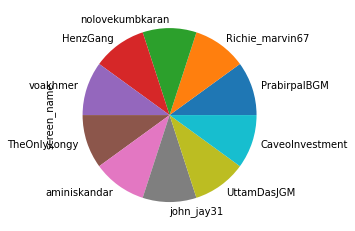

In [167]:
df.screen_name.value_counts().head(10).plot(kind="pie");

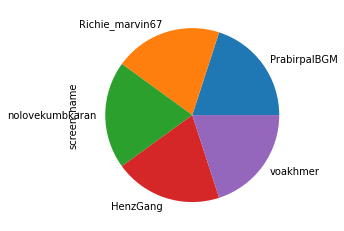

In [168]:
df.screen_name.value_counts().head(5).plot(kind="pie");

#### The top tweeters have equivalent tweets. its equally distributed

In [169]:
df.location.value_counts()

India                                   850
Sri Lanka                               350
United States                           300
New Delhi                               300
Hyderabad, India                        250
                                       ... 
Germany, Hamburg                         50
CA;FL ðºð² Patriot, Veteran ð§©     50
South Carolina, USA                      50
Deutschland                              50
Gurgaon, Haryana                         50
Name: location, Length: 234, dtype: int64

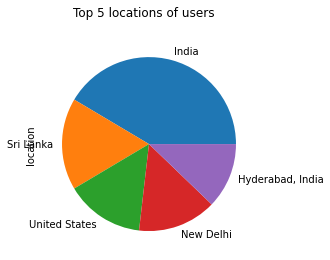

In [170]:
# top 5 locations of users
top_locations = df.location.value_counts().head(5)
top_locations.plot(kind="pie", subplots=True, title="Top 5 locations of users");

#### This Pie chart tells us most locations are not provided. From the provided ones India has the most tweets about economic hardships

In [171]:
df["source"].value_counts().head(5)

Twitter for Android    10804
Twitter for iPhone      5375
Twitter Web App         5114
Twitter for iPad         597
TweetDeck                270
Name: source, dtype: int64

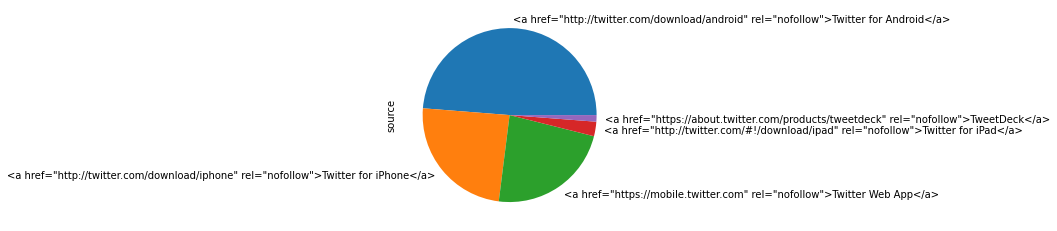

In [4]:
df["source"].value_counts().head(5).plot(kind="pie");

#### This Shows us most authors use Android Phones and Iphone, almost 50% use android.

## Bivariate Analysis

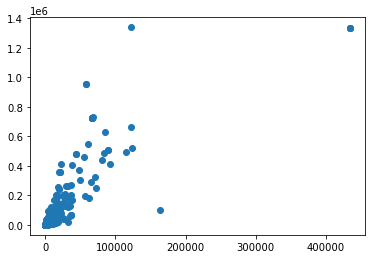

In [54]:
plt.scatter(df.retweet_count, df.favorite_count)

##### retweet count and favorite count have corelation

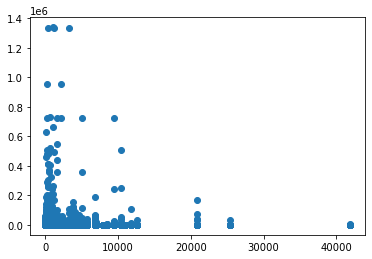

In [55]:
plt.scatter(df.friends_count, df.favorite_count)

### More Univariate analysis using Histograms

(array([  89.,  141.,  425.,  650., 1386., 9791., 1892., 1277.,  357.,
         464.]),
 array([-1. , -0.8, -0.6, -0.4, -0.2,  0. ,  0.2,  0.4,  0.6,  0.8,  1. ]),
 <BarContainer object of 10 artists>)

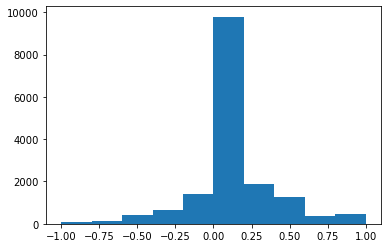

In [24]:
plt.hist(df['polarity'], bins=10)

In [ ]:
#### polarirty is evenly distributed so we can use the mean

(array([6503.,  770., 1519.,  975., 1346., 2355.,  841.,  531.,  393.,
        1239.]),
 array([0. , 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1. ]),
 <BarContainer object of 10 artists>)

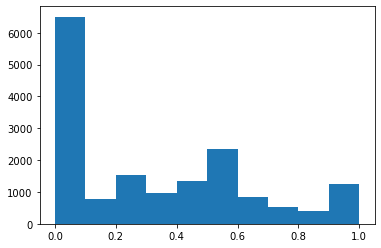

In [25]:
plt.hist(df['subjectivity'], bins=10)

##### subjectivity is right skewed. its not evenly distributed. mean is greater than median. most are in the third quartile

In [27]:
df['hashtags']

38       [{'text': 'gold', 'indices': [116, 121]}, {'te...
39                                                      []
41                                                      []
42                                                      []
43                                                      []
                               ...                        
24584                                                   []
24586                                                   []
24596                                                   []
24599                                                   []
24622                                                   []
Name: hashtags, Length: 16472, dtype: object

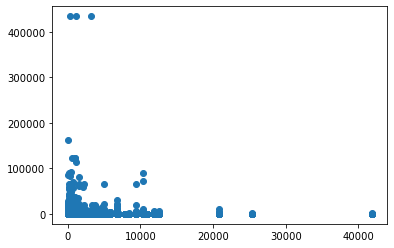

In [72]:
plt.scatter(df.friends_count, df.retweet_count)

In [146]:
### Advanced Univariate Analysis

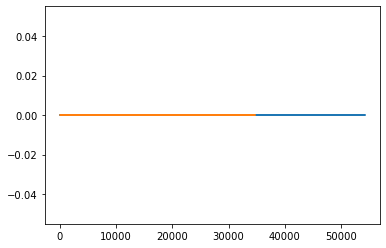

In [145]:
df_india = df.loc[df['location'] == 'india']
df_uniteds = df.loc[df['location'] == 'United States']
df_srilanka = df.loc[df['location'] == 'Sri Lanka']
df_london = df.loc[df['location'] == 'London, England']

plt.plot(df_uniteds['statuses_count'], np.zeros_like(df_uniteds['statuses_count']))
#plt.plot(df_london['statuses_count'], np.zeros_like(df_london['statuses_count']))
plt.plot(df_srilanka['statuses_count'], np.zeros_like(df_srilanka['statuses_count']))

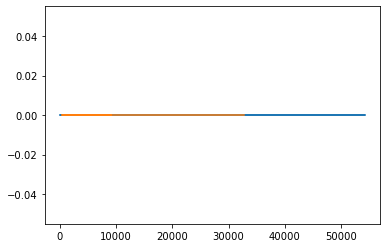

In [144]:
plt.plot(df_uniteds['statuses_count'], np.zeros_like(df_uniteds['statuses_count']))
plt.plot(df_london['statuses_count'], np.zeros_like(df_london['statuses_count']))

In [5]:
#I have realized that america has the most number of status count on this univariate analysis 